<a href="https://colab.research.google.com/github/sahya1697/SalaryPrediction/blob/main/Salary1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENGINEERING GRADUATE SALARY PRETCTION: REGRESSION VS CLASSIFICATION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SALARY** **PREDICTION**

**Data preprocessing** is a crucial step in data analysis and machine learning. The steps included are:

1. **Cleaning and Handling Missing Data**:
   - Identify and handle missing values (e.g., impute
with mean, median, or mode).
   - Remove duplicate records.
   - Address outliers that might skew your analysis.

2. **Feature Transformation**:
   - Standardize or normalize features to bring them to a common scale.
   - Encode categorical variables (e.g., one-hot encoding) for machine learning algorithms.
   - Create new features (e.g., combining existing ones).

3. **Data Reduction**:
   - Reduce dimensionality (e.g., using PCA or feature selection techniques).
   - Remove irrelevant or redundant features.

4. **Data Formatting**:
   - Ensure consistent data types (e.g., converting dates to a standard format).
   - Handle text data (cleaning, tokenization, stemming, etc.).



In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv, get_dummies
from matplotlib.pyplot import figure, subplot2grid
from seaborn import set_theme,scatterplot,displot,barplot,countplot,heatmap
from sklearn.linear_model import Ridge
from numpy import where,abs,median,nan,sqrt

In [4]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [6]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ICTAK/Engineering_graduate_salary.csv')

# Display the first few rows
print(df.head())

       ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...             -1     

In [ ]:
# df.info()

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64


In [10]:
# # Assuming 'df' is your DataFrame
# specific_value = 'cbse'
# filtered_df = df[df['10board'] != specific_value]
# print(filtered_df)


In [11]:
# # Assuming 'df' is your DataFrame
# specific_value = 50
# filtered_df = df[df['12percentage'] <= specific_value]
# print(filtered_df)

In [12]:
# # Assuming 'df' is your DataFrame
# specific_value = 'cbse'
# filtered_df = df[df['10board'] != specific_value]
# print(filtered_df)

In [13]:
df.replace(to_replace=-1, value=0,inplace=True)

In [14]:
df.drop(columns=["ID", "DOB", "CollegeCityID"], inplace=True)

In [15]:
# df["CollegeID"].nunique()

In [16]:
df["Gender"] = df["Gender"].replace({'m': 0, 'f': 1})

In [17]:
df = df[df["GraduationYear"]> 2000]
df = df[df["collegeGPA"] > 40]

In [18]:
y = df["Salary"]
#print (y)
print(max(y))
print(min(y))
print(median(y))

4000000
35000
300000.0


In [19]:
df.size

92628

In [20]:
df = df[df["Salary"] >100000]

In [21]:
df.size

87327

In [22]:
y = df["Salary"]
#print (y)
print(max(y))
print(min(y))
print(median(y))

4000000
105000
300000.0


In [23]:
df["Salary"] = pd.cut(df["Salary"], bins=20, labels=False)

In [24]:
# df = df[df["Degree"] != "MCA"]

In [25]:
df.size

87327

In [26]:
# print(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['10board', '12board', 'Degree', 'Specialization', 'CollegeState']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])


In [28]:
df.drop(columns=['10board', '12board', 'Degree', 'Specialization', 'CollegeState'], inplace=True)


In [29]:
 print(df.head())

   Gender  10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
0       1         87.80          2009         84.00       6920            1   
1       0         57.00          2010         64.50       6624            2   
2       0         77.33          2007         85.17       9084            2   
3       0         84.30          2009         86.00       8195            1   
4       1         82.00          2008         75.00       4889            2   

   collegeGPA  CollegeCityTier  GraduationYear  English  ...  MechanicalEngg  \
0       73.82                1            2013      650  ...               0   
1       65.00                0            2014      440  ...               0   
2       61.94                0            2011      485  ...               0   
3       80.40                1            2013      675  ...               0   
4       64.30                1            2012      575  ...               0   

   ElectricalEngg  TelecomEngg  CivilEngg  c

In [31]:
df.drop(columns=[ "CollegeCityTier"], inplace=True)

In [32]:
# print(df)

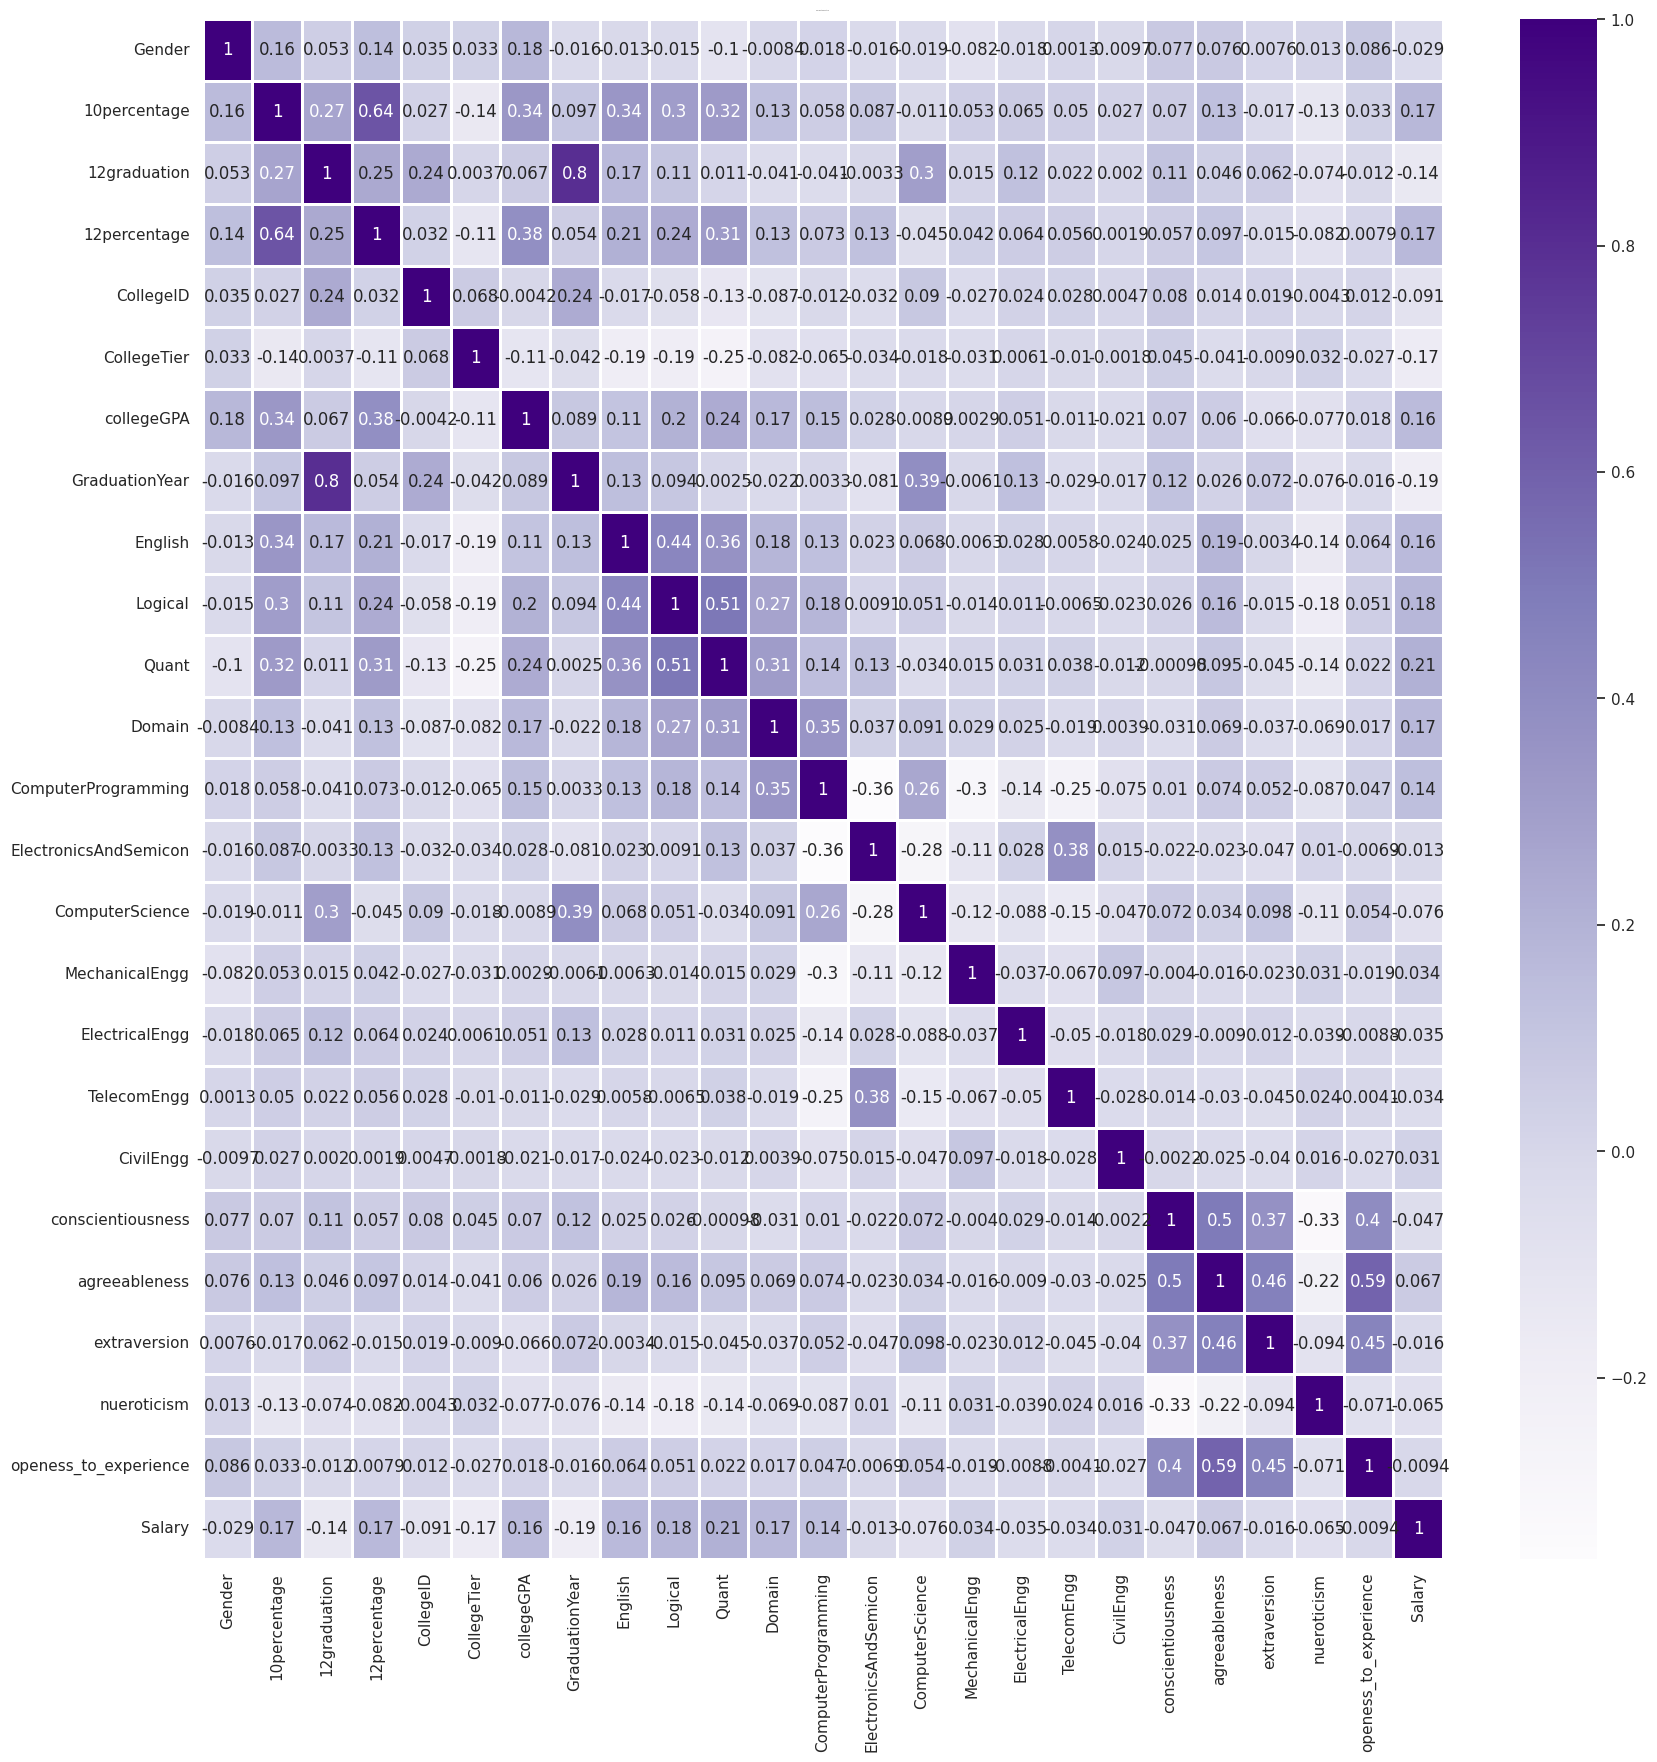

<Figure size 640x480 with 0 Axes>

In [33]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=1)
plt.title("Correlation Matrix", fontsize=1)
plt.show()
plt.savefig("hm.pdf")


In [34]:
# Save to PDF
# plt.savefig("heatmap.pdf")


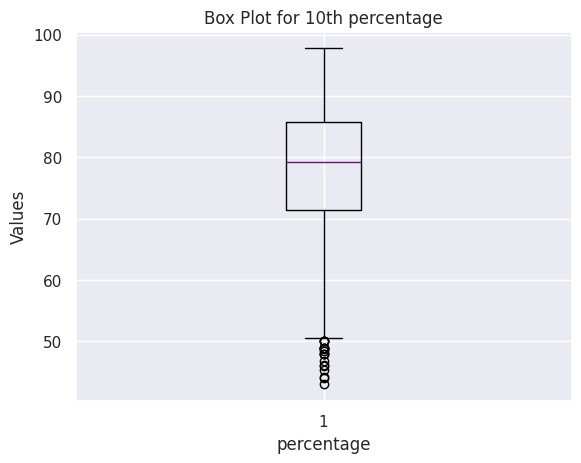

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a box plot for a specific column (e.g., 'age')
plt.boxplot(df['10percentage'])
plt.xlabel('percentage')

plt.ylabel('Values')
plt.title('Box Plot for 10th percentage')
plt.show()


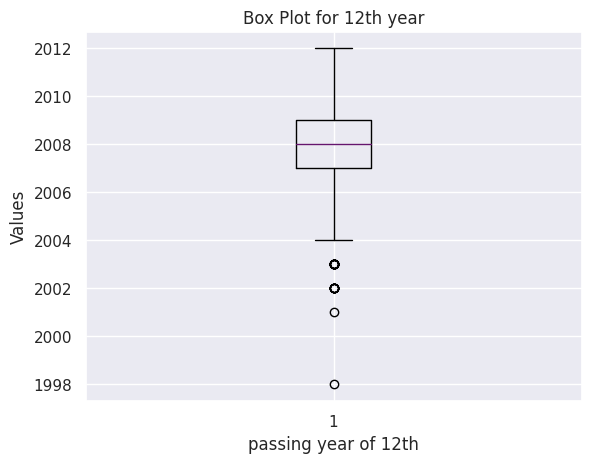

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a box plot for a specific column (e.g., 'age')
plt.boxplot(df['12graduation'])
plt.xlabel('passing year of 12th')
plt.ylabel('Values')
plt.title('Box Plot for 12th year')
plt.show()

# import pandas as pd
# import matplotlib.pyplot as plt
# # Create a box plot for a specific column (e.g., 'age')
# #plt.title('Box Plot for Age')
# #plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['collegeGPA'])
# plt.xlabel('college GPA')
# plt.ylabel('Values')
# plt.title('Box Plot for college GPA')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['GraduationYear'])
# plt.xlabel('GraduationYear')
# plt.ylabel('Values')
# plt.title('Box Plot for GraduationYear')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['English'])
# plt.xlabel('English mark')
# plt.ylabel('Values')
# plt.title('Box Plot for English mark')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Logical'])
# plt.xlabel('Age')
# plt.ylabel('Values')
# plt.title('Box Plot for logical mark')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Quant'])
# plt.xlabel('Quatitative analysis')
# plt.ylabel('Values')
# plt.title('Box Plot for Quatitative analysis')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Domain'])
# plt.xlabel('main domain mark')
# plt.ylabel('Values')
# plt.title('Box Plot for main domain mark')
# plt.show()



In [39]:
df.describe()

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2817.000000,2817.000000,2817.000000,2817.00000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,...,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,0.236422,77.908988,2008.078807,74.55754,5149.796592,1.920838,71.773841,2012.597799,503.895989,502.536386,...,23.561590,17.282925,32.083067,2.850195,-0.038064,0.140047,0.006290,-0.157894,-0.130857,0.730919
std,0.424960,9.943998,1.628112,11.07392,4770.042912,0.270040,7.312949,1.310375,105.548363,86.817493,...,97.030571,86.388553,103.434543,32.080625,1.021978,0.948006,0.959668,1.011953,0.998695,1.073644
min,0.000000,43.000000,1998.000000,40.00000,2.000000,1.000000,49.070000,2007.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,-3.893300,-5.781600,-4.600900,-2.643000,-6.992500,0.000000
25%,0.000000,71.500000,2007.000000,66.00000,501.000000,2.000000,66.700000,2012.000000,430.000000,445.000000,...,0.000000,0.000000,0.000000,0.000000,-0.649100,-0.287100,-0.604800,-0.868200,-0.669200,0.000000
50%,0.000000,79.200000,2008.000000,74.40000,3918.000000,2.000000,71.920000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.046400,0.212400,0.091400,-0.234400,-0.050600,1.000000
75%,0.000000,85.800000,2009.000000,82.80000,8818.000000,2.000000,76.360000,2014.000000,575.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.702700,0.812800,0.672000,0.526200,0.502400,1.000000
max,1.000000,97.760000,2012.000000,98.70000,18409.000000,2.000000,99.930000,2017.000000,875.000000,795.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,19.000000


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame
# # ax = sns.countplot(x='Degree', data=df)
# plt.show()
# # Assuming 'df' is your DataFrame
# # ax = sns.countplot(x='12board', data=df)
# plt.show()

# plot = displot(df["10percentage"], kde=True)

# plot = displot(df["12percentage"], kde=True)

# plot = displot(df["collegeGPA"], kde=True)

# plot = displot(df["English"], kde=True)

# plot = displot(df["conscientiousness"], kde=True)



In [ ]:
# figure(figsize=(8,4))
# plot = barplot(x=df["Degree_encoded"],y=df["Salary"])
# plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
# plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

In [ ]:
# figure(figsize=(8,4))
# plot = barplot(x=df["Gender"],y=df["Salary"])
# plot.set_xticklabels(plot.get_xticklabels(),rotation="horizontal")
# plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

REGRESSION



**1.linear regression**

*    Linear regression is a statistical model that estimates the linear relationship between a scalar response (often denoted as (y)) and one or more explanatory variables (also known as independent variables, often denoted as (x))
*   Parameters:
    fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

    copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

    n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

    positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


**2.knn regression**

*   K-Nearest Neighbors (KNN) regression is a non-parametric algorithm that predicts the value of a target variable based on the average (or weighted average) of its (k) nearest neighbors in the feature space. It’s a simple yet effective method for regression tasks.
*   Parameters:
    n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

    weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

Uniform weights are used by default.

    algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

    leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

    pfloat, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

    metricstr, DistanceMetric object or callable, default=’minkowski’
Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. See the documentation of scipy.spatial.distance and the metrics listed in distance_metrics for valid metric values.

If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

If metric is a callable function, it takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors. This works for Scipy’s metrics, but is less efficient than passing the metric name as a string.

If metric is a DistanceMetric object, it will be passed directly to the underlying computation routines.

    metric_paramsdict, default=None
Additional keyword arguments for the metric function.

    n_jobsint, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.

**3.Extreme Gradient boost regression**

*   XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm for regression tasks. It combines decision trees and gradient boosting to achieve high predictive accuracy.
*   parameters:
    n_estimators
The number of boosting stages that will be performed. Later we will plot deviance against boosting iterations.

    max_depth
Limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

    min_samples_split
The minimum number of samples required to split an internal node.
**4.Random forest regression**

*   random forest regressor combines multiple decision tree regressors to improve predictions by averaging their outputs. It’s an effective ensemble technique for regression tasks.
*   parameters:

    n_estimators
Number of trees in the forest.
    max_depth
Maximum depth of each tree.
    min_samples_split
Minimum samples required to split an internal node.
    min_samples_leaf
Minimum samples required at a leaf node.


**5.Ridge regression**


*   Ridge regression is a statistical regularization technique used in linear regression models.
*   Parameters:
    alphafloat or array-like of shape (n_targets,)
Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

    sample_weightfloat or array-like of shape (n_samples,), default=None
Individual weights for each sample. If given a float, every sample will have the same weight. If sample_weight is not None and solver=’auto’, the solver will be set to ‘cholesky’.

    solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
Solver to use in the computational routines. All solvers except ‘svd’ support both dense and sparse data. However, only ‘lsqr’, ‘sag’, ‘sparse_cg’, and ‘lbfgs’ support sparse input when fit_intercept is True.

    max_iterint, default=None
Maximum number of iterations for conjugate gradient solver. For the ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ and saga solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000.

    tolfloat, default=1e-4
Precision of the solution. Note that tol has no effect for solvers ‘svd’ and ‘cholesky’.

    verboseint, default=0
Verbosity level. Setting verbose > 0 will display additional information depending on the solver used.

    positivebool, default=False
When set to True, forces the coefficients to be positive. Only ‘lbfgs’ solver is supported in this case.

    random_stateint, RandomState instance, default=None
Used when solver == ‘sag’ or ‘saga’ to shuffle the data. See Glossary for details.

    return_n_iterbool, default=False
If True, the method also returns n_iter, the actual number of iteration performed by the solver.

    return_interceptbool, default=False
If True and if X is sparse, the method also returns the intercept, and the solver is automatically changed to ‘sag’. This is only a temporary fix for fitting the intercept with sparse data. For dense data, use sklearn.linear_model._preprocess_data before your regression.

    check_inputbool, default=True
If False, the input arrays X and y will not be checked.

**6.Neural network**


*   A neural network regressor is a machine learning model that uses interconnected layers of artificial neurons to predict continuous numeric values (regression tasks). It learns from data by adjusting weights during training.
*   List item



**Evaluation Matrics**

1.Mean Absolute Error (MAE): This metric calculates the average absolute difference between the predicted values and the actual target values. It provides a straightforward measure of prediction accuracy. The formula for MAE is:

MAE=n1​i=1∑n​∣yi​−y^​i​∣

where:

(n) is the number of data points.
(y_i) represents the actual target value.
(\hat{y}_i) represents the predicted value.



2.Mean Squared Error (MSE): MSE computes the average squared difference between predicted and actual values. It penalizes larger errors more heavily. The formula for MSE is:
MSE=n1​i=1∑n​(yi​−y^​i​)2


3.Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It provides a measure of the typical error magnitude. The formula for RMSE is:
RMSE=n1​i=1∑n​(yi​−y^​i​)2​


4.R-squared (Coefficient of Determination): R-squared represents the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with higher values indicating better fit. An R-squared close to 1 suggests a good model fit.

In [41]:

import pandas as pd


# Assuming 'X' and 'y' are column names
X=df.drop(['Salary'],axis=1)
# X = df [["10percentage", "12graduation", "12percentage", "collegeGPA", "GraduationYear", "English", "Logical", "Quant", "Domain", "ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg", "conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]]
#"ID", "Gender", "DOB", , "10board" "12board", "CollegeID", "CollegeTier", "Specialization", "CollegeState","Degree",
y = df["Salary"].values  # Target vector


In [42]:
#NORMALIZATION
import numpy as np
from sklearn.preprocessing import StandardScaler



# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

In [43]:
#LINEAR REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model (you can use R-squared or other metrics)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.67
Root Mean Squared Error (RMSE): 0.82
R-squared: 0.16


In [44]:
# Example prediction
# sample_input = X_test.iloc[0].values.reshape(1, -1)  # Use .iloc to access row by index and .values to get NumPy array
# predicted_value = model.predict(sample_input)
# print(f"Predicted value: {predicted_value[0]:.2f}")

In [45]:
#LINEAR REGRESSION
#grid search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()

# Define hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Model Parameters: {'fit_intercept': False}
MAE: 0.51
RMSE: 0.82
MSE: 0.67
R-squared: 0.16


In [46]:
#LINEAR REGRESSION
#random search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()

# Define hyperparameters to search (adjust as needed)
# Removed 'normalize' as it's not a valid parameter for LinearRegression
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=3, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Model Parameters: {'fit_intercept': False, 'copy_X': True}
MAE: 0.51
RMSE: 0.82
MSE: 0.67
R-squared: 0.16


In [47]:
!pip install scikit-learn scikit-optimize matplotlib bayesian-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [48]:
#LINEAR REGRESSION
#bayesian optimization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV

# Load your dataset and preprocess it (replace with your data)
# Split into train and test sets

# Create and fit the linear regression model
model = LinearRegression()

# Define hyperparameters to search (adjust as needed)
# Removed 'normalize' as it's not a valid parameter for LinearRegression
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform Bayesian optimization with cross-validation
# Use 'search_spaces' instead of 'param_distributions'
bayes_search = BayesSearchCV(model, search_spaces=param_dist, n_iter=10, cv=5,
                             scoring='neg_mean_squared_error', random_state=42)
bayes_search.fit(X_train, y_train)

# Get the best model
best_model = bayes_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {bayes_search.best_estimator_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Model Parameters: LinearRegression(fit_intercept=False)
MAE: 0.51
RMSE: 0.82
MSE: 0.67
R-squared: 0.16


In [49]:
#KNN REGRESSOR

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # Use KNeighborsRegressor for regression


# Create and fit the kNN model
knn = KNeighborsRegressor(n_neighbors=3) # Changed to KNeighborsRegressor
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 1.10
Root Mean Squared Error (RMSE): 1.05
R-squared: -0.38


In [51]:
#KNN REGRESSOR
#gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor # Use KNeighborsRegressor for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the kNN regressor model
model = KNeighborsRegressor() # Changed to KNeighborsRegressor

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example: search for number of neighbors
    'weights': ['uniform', 'distance']  # Example: search for weight function
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Model Parameters: {'n_neighbors': 9, 'weights': 'distance'}
MAE: 0.55
RMSE: 0.87
MSE: 0.75
R-squared: 0.06


In [52]:
#KNN REGRESSOR
#random search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the kNN regressor model
model = KNeighborsRegressor()

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'n_neighbors': [3, 5, 7, 9],  # Example: search for number of neighbors
    'weights': ['uniform', 'distance']  # Example: search for weight function
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=7, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Model Parameters: {'weights': 'distance', 'n_neighbors': 9}
MAE: 0.55
RMSE: 0.87
MSE: 0.75
R-squared: 0.06


In [110]:
#KNN REGRESSOR
#bayesian optimization
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the kNN regressor model
model = KNeighborsRegressor()

# Define hyperparameters to search (adjust as needed)
# Use 'search_spaces' instead of 'param_distributions' for BayesSearchCV
param_dist = {
    'n_neighbors': (3, 9),  # Example: search range for number of neighbors
    'weights': ['uniform', 'distance']  # Example: search for weight function
}

# Perform Bayesian optimization with cross-validation
bayes_search = BayesSearchCV(model, search_spaces=param_dist, n_iter=10, cv=5, # Changed 'param_distributions' to 'search_spaces'
                             scoring='neg_mean_squared_error', random_state=42)
bayes_search.fit(X_train, y_train)

# Get the best model
best_model = bayes_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {bayes_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Model Parameters: OrderedDict([('n_neighbors', 9), ('weights', 'distance')])
MAE: 0.55
RMSE: 0.87
MSE: 0.75
R-squared: 0.06


In [54]:
#XGBOOST REGRESSOR
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings



# Create an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model
xg_reg.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Make predictions
y_pred = xg_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")



# Evaluate the model (you can use metrics like RMSE or R-squared)
# Example: RMSE


# Example prediction for a new data point
# new_data_point = X_test.iloc[0].values.reshape(1, -1)
# predicted_price = xg_reg.predict(new_data_point)
#print(f"Predicted price: ${predicted_price[0]:.2f}")


Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.74
Root Mean Squared Error (RMSE): 0.86
R-squared: 0.08


In [55]:
#XGBOOST REGRESSOR
#gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost regressor
xg_reg = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees
    'max_depth': [3, 5, 7],  # Explore different tree depths
    'learning_rate': [0.01, 0.1, 0.2]  # Try different learning rates
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xg_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_xg_reg = grid_search.best_estimator_

# Make predictions
y_pred = best_xg_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7937c815ea10>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 637, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/data.py", line 1416, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 626, in input_data
    self.proxy.set_info(
  File "/usr/local/lib/python3.1

Best Model Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
MAE: 0.53
RMSE: 0.87
R-squared: 0.05


In [56]:
#XGBOOST REGRESSOR
#randomsearch
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost regressor
xg_reg = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees
    'max_depth': [3, 5, 7],  # Explore different tree depths
    'learning_rate': [0.01, 0.1, 0.2]  # Try different learning rates
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(xg_reg, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_xg_reg = random_search.best_estimator_

# Make predictions
y_pred = best_xg_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Model Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
MAE: 0.53
RMSE: 0.85
R-squared: 0.10


In [57]:
#XGBOOST REGRESSOR
# bayesian optimization
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost regressor
xg_reg = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'n_estimators': (50, 200),  # Adjust the range for the number of trees
    'max_depth': (3, 7),  # Explore different tree depths
    'learning_rate': (0.01, 0.2)  # Try different learning rates
}

# Perform Bayesian optimization with cross-validation
# Use 'search_spaces' instead of 'param_distributions'
bayes_search = BayesSearchCV(xg_reg, search_spaces=param_dist, n_iter=10, cv=5,
                             scoring='neg_mean_squared_error', random_state=42)

# Handle potential errors during fitting
try:
    bayes_search.fit(X_train, y_train)
except XGBoostError as e:
    print(f"XGBoostError occurred: {e}")
    # Add debugging or handling logic here, such as inspecting the data or adjusting hyperparameters

# Get the best model if fitting was successful
if hasattr(bayes_search, 'best_estimator_'):
    best_xg_reg = bayes_search.best_estimator_

    # Make predictions
    y_pred = best_xg_reg.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Best Model Parameters: {bayes_search.best_params_}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
else:
    print("Bayesian optimization failed to find a suitable model.")

Best Model Parameters: OrderedDict([('learning_rate', 0.16435523778789904), ('max_depth', 4), ('n_estimators', 140)])
MAE: 0.55
RMSE: 0.86
R-squared: 0.07


In [ ]:
#RANDOM FOREST REGRESSOR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())

xg_reg.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


# Example prediction for a new data point
#new_data_point = X_test.iloc[0].values.reshape(1, -1)
#predicted_price = rf_regressor.predict(new_data_point)
#print(f"Predicted price: ${predicted_price[0]:.2f}")



Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.78
Root Mean Squared Error (RMSE): 0.88
R-squared: 0.06


In [58]:
#RANDOM FOREST REGRESSOR
#gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees
    'max_depth': [5, 10, 15],  # Explore different tree depths
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())

# Get the best model
best_rf_regressor = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Model Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
MAE: 0.57
RMSE: 0.91
R-squared: -0.04


In [80]:
#RANDOM FOREST REGRESSOR
#random search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees
    'max_depth': [5, 10, 15],  # Explore different tree depths
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train.ravel())

# Get the best model
best_rf_regressor = random_search.best_estimator_

# Make predictions
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Model Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
MAE: 0.56
RMSE: 0.91
R-squared: -0.03


In [60]:
#RANDOM FOREST REGRESSOR
#bayesian optimization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'n_estimators': (50, 200),  # Adjust the range for the number of trees
    'max_depth': (5, 15),  # Explore different tree depths
    'min_samples_split': (2, 10)  # Minimum samples required to split a node
}

# Perform Bayesian optimization with cross-validation
# Use 'search_spaces' instead of 'param_distributions' for BayesSearchCV
bayes_search = BayesSearchCV(rf_regressor, search_spaces=param_dist, n_iter=10, cv=5,
                             scoring='neg_mean_squared_error', random_state=42)
bayes_search.fit(X_train, y_train.ravel())

# Get the best model
best_rf_regressor = bayes_search.best_estimator_

# Make predictions
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {bayes_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Model Parameters: OrderedDict([('max_depth', 9), ('min_samples_split', 9), ('n_estimators', 66)])
MAE: 0.57
RMSE: 0.91
R-squared: -0.04


In [61]:
#RIDGE REGRESSION
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score


# Define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Fit the ridge regression model
model = Ridge(alpha=0.99)  # Use the optimal alpha value from previous steps
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


MAE: 0.51
MSE: 0.67
RMSE: 0.82
R-squared: 0.16


In [62]:
#RIDGE REGRESSION
#grid search
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define hyperparameters to search
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

# Create Ridge regression model
ridge_model = Ridge()

# Perform grid search with cross-validation
ridge_grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = ridge_grid_search.best_estimator_

# Make predictions
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Ridge Model Parameters: {ridge_grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Ridge Model Parameters: {'alpha': 100}
MAE: 0.51
RMSE: 0.82
R-squared: 0.16


In [63]:
#RIDGE REGRESSION
#randomsearch
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Ridge regression model
ridge_model = Ridge()

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'alpha': np.logspace(-15, 2, num=100)  # Adjust the range for alpha
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = random_search.best_estimator_

# Make predictions
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Ridge Model Parameters: {random_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Ridge Model Parameters: {'alpha': 0.1788649529057435}
MAE: 0.51
RMSE: 0.82
R-squared: 0.16


In [64]:
#RIDGE REGRESSION
#bayesian optimization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bayesian Ridge regression model
bayesian_ridge_model = BayesianRidge()

# Define hyperparameters to search (adjust as needed)
param_dist = {
    'alpha_1': np.logspace(-6, 2, num=100),  # Adjust the range for alpha_1
    'alpha_2': np.logspace(-6, 2, num=100),  # Adjust the range for alpha_2
    'lambda_1': np.logspace(-6, 2, num=100),  # Adjust the range for lambda_1
    'lambda_2': np.logspace(-6, 2, num=100)  # Adjust the range for lambda_2
}

# Perform Bayesian optimization with cross-validation
bayesian_search = RandomizedSearchCV(bayesian_ridge_model, param_distributions=param_dist,
                                     n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
bayesian_search.fit(X_train, y_train.ravel())

# Get the best model
best_bayesian_ridge_model = bayesian_search.best_estimator_

# Make predictions
y_pred = best_bayesian_ridge_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Bayesian Ridge Model Parameters: {bayesian_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")



Best Bayesian Ridge Model Parameters: {'lambda_2': 0.00026560877829466864, 'lambda_1': 0.04862601580065353, 'alpha_2': 0.7924828983539186, 'alpha_1': 0.0001261856883066021}
MAE: 0.51
RMSE: 0.82
R-squared: 0.16


In [65]:
#lasso REgression
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(X_train, y_train)

print(f"Optimal alpha (lambda): {model.alpha_:.2f}")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 914.5956359105978, tolerance: 0.21581486255071677
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1

Optimal alpha (lambda): 0.01
Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.67
Root Mean Squared Error (RMSE): 0.82
R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931.1015086702689, tolerance: 0.21917945529142016
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective di

In [66]:
#Elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization

# Assuming X_train and y_train are already defined and normalized
# If not, normalize them here:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train.reshape(-1, 1))

# Initialize the Elastic Net model without the 'normalize' parameter
elastic_net = ElasticNet()

# Define the hyperparameter grid for grid search
param_grid = {
    'alpha': np.logspace(-5, 2, 8),  # Range of alpha values
    'l1_ratio': [0.2, 0.4, 0.6, 0.8]  # L1 ratio (mixing parameter)
}

# Perform grid search with cross-validation
search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10, n_jobs=1, refit=True)
search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = search.best_params_['alpha']
best_l1_ratio = search.best_params_['l1_ratio']

# Create the final Elastic Net model with the best hyperparameters
final_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio) # Remove normalize=True
final_elastic_net.fit(X_train, y_train)



# Print the best hyperparameters
print(f"Best alpha: {best_alpha:.4f}")
print(f"Best L1 ratio: {best_l1_ratio:.2f}")

y_pred = final_elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Best alpha: 0.0100
Best L1 ratio: 0.60
Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.67
Root Mean Squared Error (RMSE): 0.82
R-squared: 0.16


In [68]:
#Robust Regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the robust regression model using RANSAC
# For older scikit-learn versions, you don't need to specify 'base_estimator'
ransac_model = RANSACRegressor(random_state=42)
ransac_model.fit(X_train, y_train)

# Evaluate the robust model
y_pred_ransac = ransac_model.predict(X_test)
mae_ransac = mean_absolute_error(y_test, y_pred_ransac)
mse_ransac = mean_squared_error(y_test, y_pred_ransac)
rmse_ransac = np.sqrt(mse_ransac)
r2_ransac = r2_score(y_test, y_pred_ransac)

print(f"Robust Regression (RANSAC) Metrics:")
print(f"Mean Absolute Error (MAE): {mae_ransac:.2f}")
print(f"Mean Squared Error (MSE): {mse_ransac:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ransac:.2f}")
print(f"R-squared: {r2_ransac:.2f}")

Robust Regression (RANSAC) Metrics:
Mean Absolute Error (MAE): 0.57
Mean Squared Error (MSE): 0.82
Root Mean Squared Error (RMSE): 0.91
R-squared: -0.03


In [70]:
#Elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalization

# Assuming X and y are defined somewhere above

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler fitted on training data

# Initialize the Elastic Net model without the 'normalize' parameter
elastic_net = ElasticNet()

# Define the hyperparameter grid for grid search
param_grid = {
    'alpha': np.logspace(-5, 2, 8),  # Range of alpha values
    'l1_ratio': [0.2, 0.4, 0.6, 0.8]  # L1 ratio (mixing parameter)
}

# Perform grid search with cross-validation
search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10, n_jobs=1, refit=True)
search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = search.best_params_['alpha']
best_l1_ratio = search.best_params_['l1_ratio']

# Create the final Elastic Net model with the best hyperparameters
final_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio) # Remove normalize=True
final_elastic_net.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best alpha: {best_alpha:.4f}")
print(f"Best L1 ratio: {best_l1_ratio:.2f}")

# Make predictions on the test set (remember to normalize X_test if you normalized X_train)
y_pred = final_elastic_net.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Best alpha: 0.0100
Best L1 ratio: 0.60
Mean Absolute Error (MAE): 0.51
Mean Squared Error (MSE): 0.67
Root Mean Squared Error (RMSE): 0.82
R-squared: 0.16


In [71]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [72]:
dfx.head(10)

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,1.797145,0.994848,0.565905,0.852827,0.371174,-3.410614,0.279849,0.306990,1.384483,1.871656,...,-0.532643,-0.242870,-0.200096,-0.310233,-0.088861,-0.118357,0.251998,1.285370,0.300259,0.420380
1,-0.556438,-2.103048,1.180222,-0.908380,0.309109,0.293202,-0.926445,1.070266,-0.605479,-0.778050,...,-0.532643,-0.242870,-0.200096,-0.310233,-0.088861,1.146671,-0.099328,1.285370,0.676134,-0.155273
2,-0.556438,-0.058235,-0.662730,0.958499,0.824920,0.293202,-1.344955,-1.219561,-0.179059,-0.317232,...,-0.532643,-0.242870,-0.200096,2.203881,-0.088861,0.536373,-0.277734,1.601369,-0.130766,-0.156876
3,-0.556438,0.642815,0.565905,1.033463,0.638515,-3.410614,1.179783,0.306990,1.621384,1.353235,...,-0.532643,-0.242870,-0.200096,-0.310233,-0.088861,-0.399528,0.076335,0.324243,0.425584,0.612265
4,1.797145,0.411478,-0.048413,0.039962,-0.054684,0.293202,-1.022182,-0.456285,0.673782,-0.086823,...,-0.532643,-0.242870,-0.200096,-0.310233,-0.088861,-1.429968,-0.936181,-1.121409,0.217563,0.317728
5,1.797145,0.528152,-0.662730,0.220599,1.216181,-3.410614,3.850862,0.306990,0.294742,1.065223,...,-0.532643,-0.242870,-0.200096,2.716373,-0.088861,0.865499,-0.801980,-0.797073,-0.827365,-0.155273
6,1.797145,-0.544042,-0.662730,-1.928977,1.935589,0.293202,-0.516141,0.306990,0.057842,-0.086823,...,-0.532643,4.591517,-0.200096,-0.310233,-0.088861,0.162717,-0.626317,0.324243,1.052108,0.036611
7,1.797145,-0.091427,0.565905,1.214100,1.689636,0.293202,-0.105837,0.306990,-1.268800,-0.374834,...,-0.532643,-0.242870,-0.200096,-0.310233,-0.088861,0.162717,0.427661,0.484431,1.052108,-0.155273
8,-0.556438,-0.111543,1.180222,1.187005,0.039462,0.293202,0.188215,1.070266,0.057842,0.604405,...,1.935759,-0.242870,-0.200096,-0.310233,-0.088861,-0.118357,-0.626317,0.164055,0.676134,0.036611
9,1.797145,-2.103048,0.565905,-0.140674,0.670177,0.293202,-0.231663,1.070266,-0.036918,-1.066062,...,1.761055,-0.242870,-0.200096,-0.310233,-0.088861,-0.680602,-0.626317,-0.316509,1.553208,0.804149


In [76]:
dfx.describe()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,...,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03,2.817000e+03
mean,-1.324228e-17,6.476104e-16,1.321958e-14,5.183405e-16,9.080418e-17,2.761961e-16,-4.136635e-16,2.002421e-14,-1.803472e-16,-6.936431e-17,...,2.270105e-17,-3.279040e-17,-1.954812e-17,7.567015e-18,-3.909625e-17,-3.405157e-17,2.774572e-17,1.450345e-17,2.143988e-17,3.783508e-18
std,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,...,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00,1.000178e+00
min,-5.564382e-01,-3.511182e+00,-6.191588e+00,-3.121178e+00,-1.079385e+00,-3.410614e+00,-3.105159e+00,-4.272664e+00,-3.069242e+00,-3.542961e+00,...,-5.326433e-01,-2.428696e-01,-2.000959e-01,-3.102326e-01,-8.886053e-02,-3.772999e+00,-6.247535e+00,-4.801666e+00,-2.456189e+00,-6.871832e+00
25%,-5.564382e-01,-6.446226e-01,-6.627302e-01,-7.729024e-01,-9.747547e-01,2.932023e-01,-6.939392e-01,-4.562855e-01,-7.002393e-01,-6.628457e-01,...,-5.326433e-01,-2.428696e-01,-2.000959e-01,-3.102326e-01,-8.886053e-02,-5.980021e-01,-4.506544e-01,-6.368848e-01,-7.020409e-01,-5.391423e-01
50%,-5.564382e-01,1.298513e-01,-4.841267e-02,-1.422874e-02,-2.582818e-01,2.932023e-01,1.998988e-02,3.069902e-01,-3.691843e-02,2.838197e-02,...,-5.326433e-01,-2.428696e-01,-2.000959e-01,-3.102326e-01,-8.886053e-02,8.266196e-02,7.633479e-02,8.870289e-02,-7.561571e-02,8.037625e-02
75%,-5.564382e-01,7.936861e-01,5.659049e-01,7.444449e-01,7.691450e-01,2.932023e-01,6.272399e-01,1.070266e+00,6.737825e-01,7.196096e-01,...,-5.326433e-01,-2.428696e-01,-2.000959e-01,-3.102326e-01,-8.886053e-02,7.249622e-01,7.097768e-01,6.938109e-01,6.761340e-01,6.341974e-01
max,1.797145e+00,1.996635e+00,2.408858e+00,2.180506e+00,2.780176e+00,2.932023e-01,3.850862e+00,3.360093e+00,3.516586e+00,3.369316e+00,...,3.496826e+00,6.178927e+00,7.441162e+00,4.988745e+00,1.549964e+01,1.989989e+00,1.861873e+00,2.246393e+00,3.469547e+00,1.763672e+00


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

In [77]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-3.733041,1.407267,-0.974527,0.397518,-0.548847,-0.551296,-1.360288,-1.837644,0.419452,1.799051,...,-1.857415,1.059479,-0.122830,-0.402309,-0.521093,-0.407691,0.463649,0.222836,0.502115,-0.127253
1,2.184460,-2.906296,1.314350,0.195594,-0.437852,-0.054977,-0.053198,-0.394760,0.196654,0.021101,...,-0.398495,-0.088460,-1.922104,-0.238809,-0.247893,1.039436,0.338263,0.746345,-0.553723,-0.225409
2,0.693860,0.189291,-1.663753,2.556058,-1.045996,-1.338575,-0.451769,0.689703,0.332688,-1.061304,...,-0.147858,0.754289,0.439053,-0.827310,-0.879875,0.505154,0.065161,0.286181,-0.942770,-0.039184
3,-3.312117,1.344136,-0.165865,-1.407222,-0.580613,0.171186,-1.097027,-1.681431,0.517996,0.809109,...,-0.039616,-0.386106,-1.105944,-0.117802,0.327923,0.237130,0.431701,0.189275,-0.663334,-0.299549
4,1.265152,0.699365,0.561535,-0.004635,1.350068,0.008581,-0.429893,-0.471806,-0.558756,0.923899,...,0.122179,-0.226569,0.060217,0.175344,1.005002,-0.088453,0.681077,0.001024,-0.282465,0.050304
5,-2.406944,2.149519,-0.566682,1.591713,1.144676,-1.675225,-0.973436,0.064906,-0.936212,2.137449,...,1.437547,0.121136,-0.461297,-0.649730,-0.446351,0.092752,0.872403,0.091942,0.720939,0.254131
6,1.806421,-0.630220,0.372645,0.967225,0.037177,3.238005,-1.215992,-0.354664,-0.277774,-2.180199,...,-0.232152,0.343951,0.215260,-0.848295,-0.772140,0.182069,0.647413,-0.543029,0.473417,0.480805
7,0.438436,-1.219558,0.997498,0.404046,2.689369,-0.255638,-0.612952,-0.396619,0.714677,-0.619407,...,-0.607448,0.612877,-0.813486,0.204506,0.282101,1.011483,-0.399307,0.644117,-0.397664,0.157215
8,-1.006537,-0.407047,2.132807,-1.119015,0.145693,-0.270412,-0.570130,-0.270048,0.436910,-0.692798,...,0.261273,0.021661,0.424811,-0.010079,0.001176,0.876161,0.463350,0.836554,-0.438664,-0.023821
9,0.931130,-1.000949,1.835941,-0.934618,0.690720,-0.696576,-1.084896,-1.070940,1.001786,-0.257405,...,-0.083890,0.072556,1.100821,0.336394,-0.489609,-1.467050,0.122225,1.256591,-0.625369,0.129970


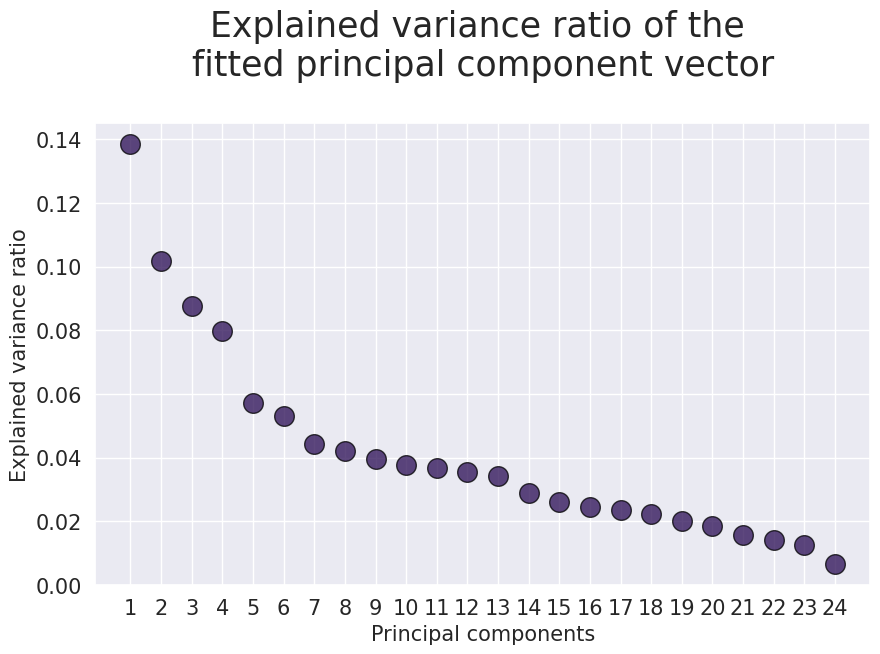

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

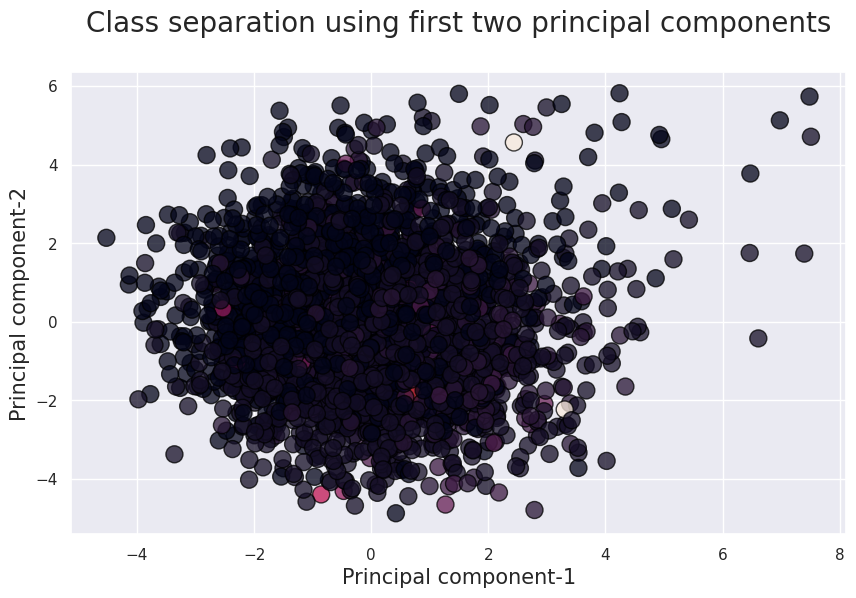

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[1],dfx_trans[0],c=df['Salary'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

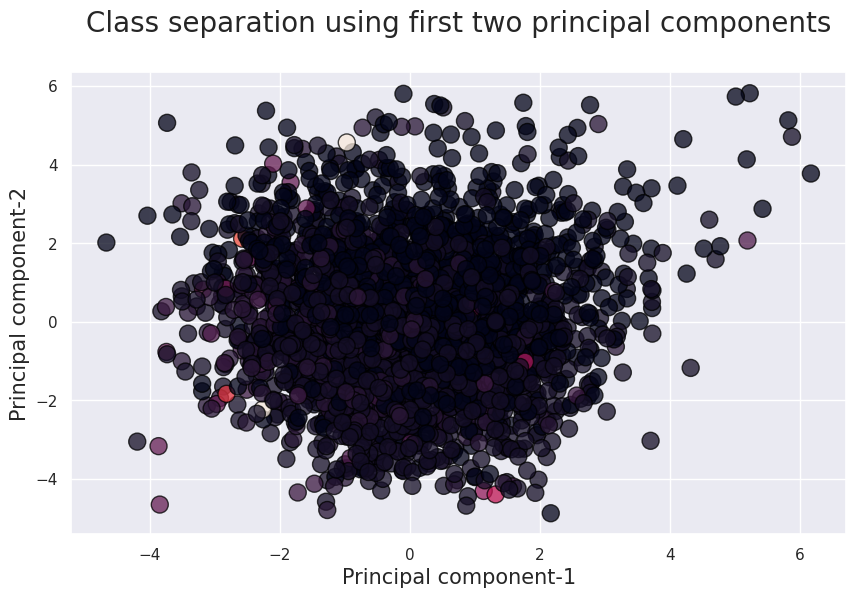

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[2],dfx_trans[0],c=df['Salary'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

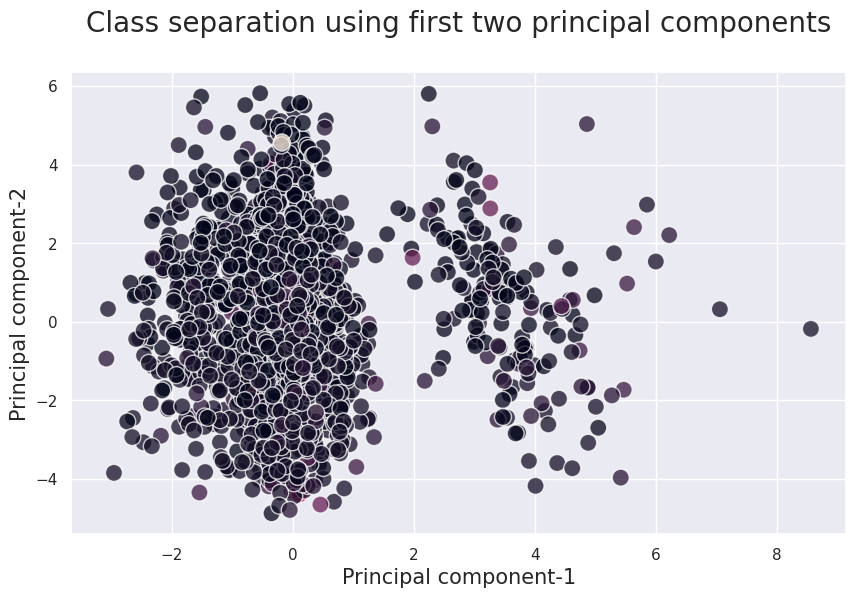

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[5],dfx_trans[0],c=df['Salary'],edgecolors='w',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [115]:
#NEURAL NETWORK
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(2))
model.add(keras.layers.Dense(1))  # Output layer for regression
model.summary()

def r2_metric(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

model.compile(loss='mean_squared_error',optimizer='adam',metrics=[r2_metric])
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Set:", loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,939 (11.48 KB)

 Trainable params: 2,939 (11.48 KB)

 Non-trainable params: 0 (0.00 B)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0399 - r2_metric: -0.1142  
Mean Squared Error on Test Set: [0.83792644739151, -0.20005474984645844]


In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [120]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[es, sm])

Epoch 1/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6934 - val_loss: 0.6785
Epoch 2/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2414 - val_loss: 0.6688
Epoch 3/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5218 - val_loss: 0.6987
Epoch 4/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6680 - val_loss: 0.6725
Epoch 5/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6317 - val_loss: 0.6983
Epoch 6/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8755 - val_loss: 0.6854
Epoch 7/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7810 - val_loss: 0.6885
Epoch 8/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6307 - val_loss: 0.7340
Epoch 9/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6794 - val_loss: 0.7253
Epoch 10/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0261 - val_loss: 0.7048
Epoch 11/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0292 - val_loss: 0.6970
Epoch 12/500
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [121]:
es = keras.callbacks.EarlyStopping(monitor='loss' , patience=10, restore_best_weights=True)
sm =keras.callbacks.ModelCheckpoint("/content/dnn.keras", monitor='val_loss') # Change the file extension to '.keras'

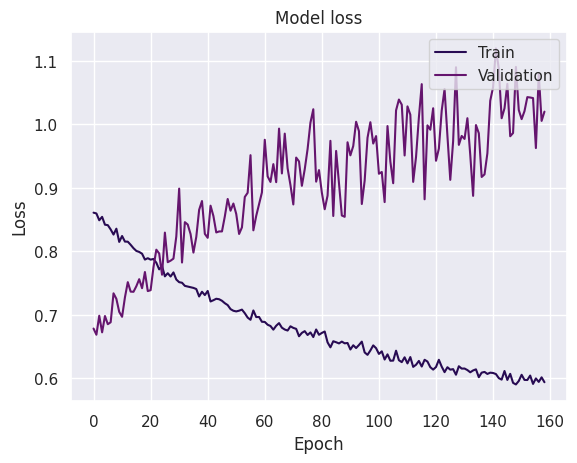

In [122]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [123]:
# ,callbacks=[es,sm]
history = model.fit(X_train, y_train, epochs=10,callbacks=[es,sm])
test_loss= model.evaluate(X_test,y_test)
print(test_loss)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5339
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4653
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4240
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5913
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6126
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5289
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4552
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4658
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4881
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5463
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3218 
1.090325951576233


In [126]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [127]:

import keras_tuner

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Int('units_input', min_value=32, max_value=512, step=32),
      activation='relu',
      input_dim=X_train.shape[1]
  ))
  for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
    model.add(keras.layers.Dense(
        hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
      ),
      loss='mean_squared_error',
      metrics=['mean_squared_error']
  )
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)

tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the best model
history1 = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 19s]
val_mean_squared_error: 0.6756578087806702

Best val_mean_squared_error So Far: 0.6657668749491373
Total elapsed time: 00h 02m 34s
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.0949 - mean_squared_error: 1.0949 - val_loss: 0.7233 - val_mean_squared_error: 0.7233
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1295 - mean_squared_error: 1.1295 - val_loss: 0.6876 - val_mean_squared_error: 0.6876
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4116 - mean_squared_error: 1.4116 - val_loss: 0.6724 - val_mean_squared_error: 0.6724
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8472 - mean_squared_error: 0.8472 - val_loss: 0.6791 - val_mean_squared_error: 0.6791
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1673 - mean_squared_error: 1.1673 - val_loss: 0.7421 - val_mean_squared_error: 0.7421
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6930 - mean_squared_error: 0.6930 - val_loss: 0

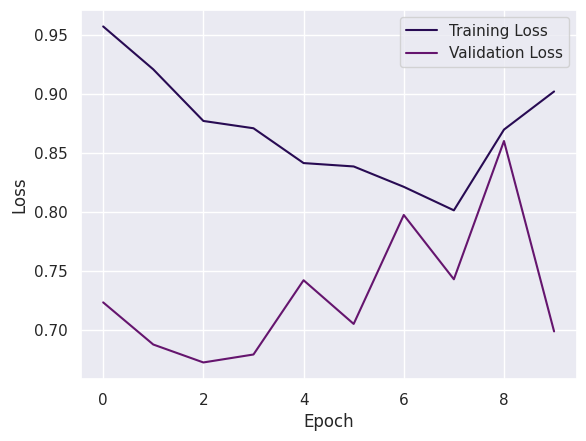

In [128]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
